In [1]:
# Ejecutamos el fichero principal, que nos realizara las stages 1 y 2 (recoleccion de tweets, analisis sentimental y generacion de csv)

In [2]:
%run Twitter_Analyzer.py

2021-06-18 09:17:57,971 [INFO] lithops.config -- Lithops v2.3.4
2021-06-18 09:17:57,985 [INFO] lithops.storage.backends.ibm_cos.ibm_cos -- IBM COS Storage client created - Region: eu-de
2021-06-18 09:17:57,988 [INFO] lithops.serverless.backends.ibm_cf.ibm_cf -- IBM CF client created - Region: eu-de - Namespace: SDPrac2
2021-06-18 09:17:57,989 [INFO] lithops.executors -- Serverless Executor created with ID: be5b19-0
2021-06-18 09:17:57,989 [INFO] lithops.invokers -- ExecutorID be5b19-0 | JobID M000 - Selected Runtime: ismaelhg2000/sdprac2runtime:1.0 - 256MB
2021-06-18 09:17:57,996 [INFO] lithops.job.job -- ExecutorID be5b19-0 | JobID M000 - Uploading function and data - Total: 2.9KiB
2021-06-18 09:17:58,399 [INFO] lithops.invokers -- ExecutorID be5b19-0 | JobID M000 - Starting function invocation: CloudWorker() - Total: 17 activations
2021-06-18 09:17:58,412 [INFO] lithops.invokers -- ExecutorID be5b19-0 | JobID M000 - View execution logs at C:\Users\21May\AppData\Local\Temp\lithops\log

    0%|          | 0/17  

2021-06-18 09:18:16,697 [INFO] lithops.executors -- ExecutorID be5b19-0 - Cleaning temporary data
2021-06-18 09:18:16,701 [INFO] lithops.wait -- ExecutorID be5b19-0 - Getting results from functions
2021-06-18 09:18:16,703 [INFO] lithops.invokers -- ExecutorID be5b19-0 | JobID M001 - Selected Runtime: ismaelhg2000/sdprac2runtime:1.0 - 256MB
2021-06-18 09:18:16,710 [INFO] lithops.job.job -- ExecutorID be5b19-0 | JobID M001 - Uploading function and data - Total: 4.4KiB
2021-06-18 09:18:17,068 [INFO] lithops.invokers -- ExecutorID be5b19-0 | JobID M001 - Starting function invocation: CloudWorker() - Total: 17 activations
2021-06-18 09:18:17,078 [INFO] lithops.invokers -- ExecutorID be5b19-0 | JobID M001 - View execution logs at C:\Users\21May\AppData\Local\Temp\lithops\logs\be5b19-0-M001.log
2021-06-18 09:18:17,081 [INFO] lithops.wait -- ExecutorID be5b19-0 - Waiting for functions to complete


    0%|          | 0/17  

2021-06-18 09:20:04,199 [INFO] lithops.executors -- ExecutorID be5b19-0 - Cleaning temporary data
2021-06-18 09:20:04,204 [INFO] lithops.wait -- ExecutorID be5b19-0 - Getting results from functions


In [3]:
# Ejecutamos la funcion que nos devolvera la media del analisis sentimental de cada comunidad, para posteriormente plottearla

In [4]:
# Se ejecutara en paralelo por cada comunidad

In [5]:
with Pool() as pool:
    res = pool.starmap(sentymental_mean, LISTACOMUNIDADES)

2021-06-18 09:20:04,246 [INFO] lithops.config -- Lithops v2.3.4
2021-06-18 09:20:04,256 [INFO] lithops.storage.backends.ibm_cos.ibm_cos -- IBM COS Storage client created - Region: eu-de
2021-06-18 09:20:04,260 [INFO] lithops.serverless.backends.ibm_cf.ibm_cf -- IBM CF client created - Region: eu-de - Namespace: SDPrac2
2021-06-18 09:20:04,261 [INFO] lithops.executors -- Serverless Executor created with ID: be5b19-1
2021-06-18 09:20:04,261 [INFO] lithops.invokers -- ExecutorID be5b19-1 | JobID M000 - Selected Runtime: ismaelhg2000/sdprac2runtime:1.0 - 256MB
2021-06-18 09:20:04,267 [INFO] lithops.job.job -- ExecutorID be5b19-1 | JobID M000 - Uploading function and data - Total: 4.1KiB
2021-06-18 09:20:04,723 [INFO] lithops.invokers -- ExecutorID be5b19-1 | JobID M000 - Starting function invocation: CloudWorker() - Total: 17 activations
2021-06-18 09:20:04,733 [INFO] lithops.invokers -- ExecutorID be5b19-1 | JobID M000 - View execution logs at C:\Users\21May\AppData\Local\Temp\lithops\log

    0%|          | 0/17  

2021-06-18 09:20:09,828 [INFO] lithops.wait -- ExecutorID be5b19-1 - Getting results from functions


    0%|          | 0/17  

2021-06-18 09:20:10,223 [INFO] lithops.executors -- ExecutorID be5b19-1 - Cleaning temporary data


In [6]:
# Convertimos las medias a un dataframe, para mostrarlas y plottearlas

In [7]:
df = pd.DataFrame(res,columns=["Sentiment","CCAA"])

In [8]:
# Las mostramos

In [9]:
df.head(17)

,Sentiment,CCAA
0,0.081260,catalunya
1,0.136298,andalucia
2,0.233342,aragon
3,0.073400,asturias
4,0.670500,cantabria
5,0.290640,castilla y leon
6,-0.042600,castilla la mancha
7,0.077175,valencia
8,0.004136,extremadura
9,0.030708,galicia


In [10]:
# Empezamos a importar librerias para el plotting

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [12]:
# Leemos fichero de contorno (shapefile) del mapa

In [21]:
espania = gpd.read_file("data/gadm36_ESP_1.shp", encoding='utf-8')

In [14]:
# Mergeamos las dos tablas, se asociara cada comunidad con su valor, para el plotting

In [22]:
espania = espania.merge(df, left_on=['NAME_1'],right_on=['CCAA'], how='left')

In [16]:
# Definimos el tamaño del plot

In [23]:
plt.rcParams["figure.figsize"]=20,20

In [18]:
# Plotteamos en forma de mapa, el mas negativo se representara en rojo y el mas positivo en verde

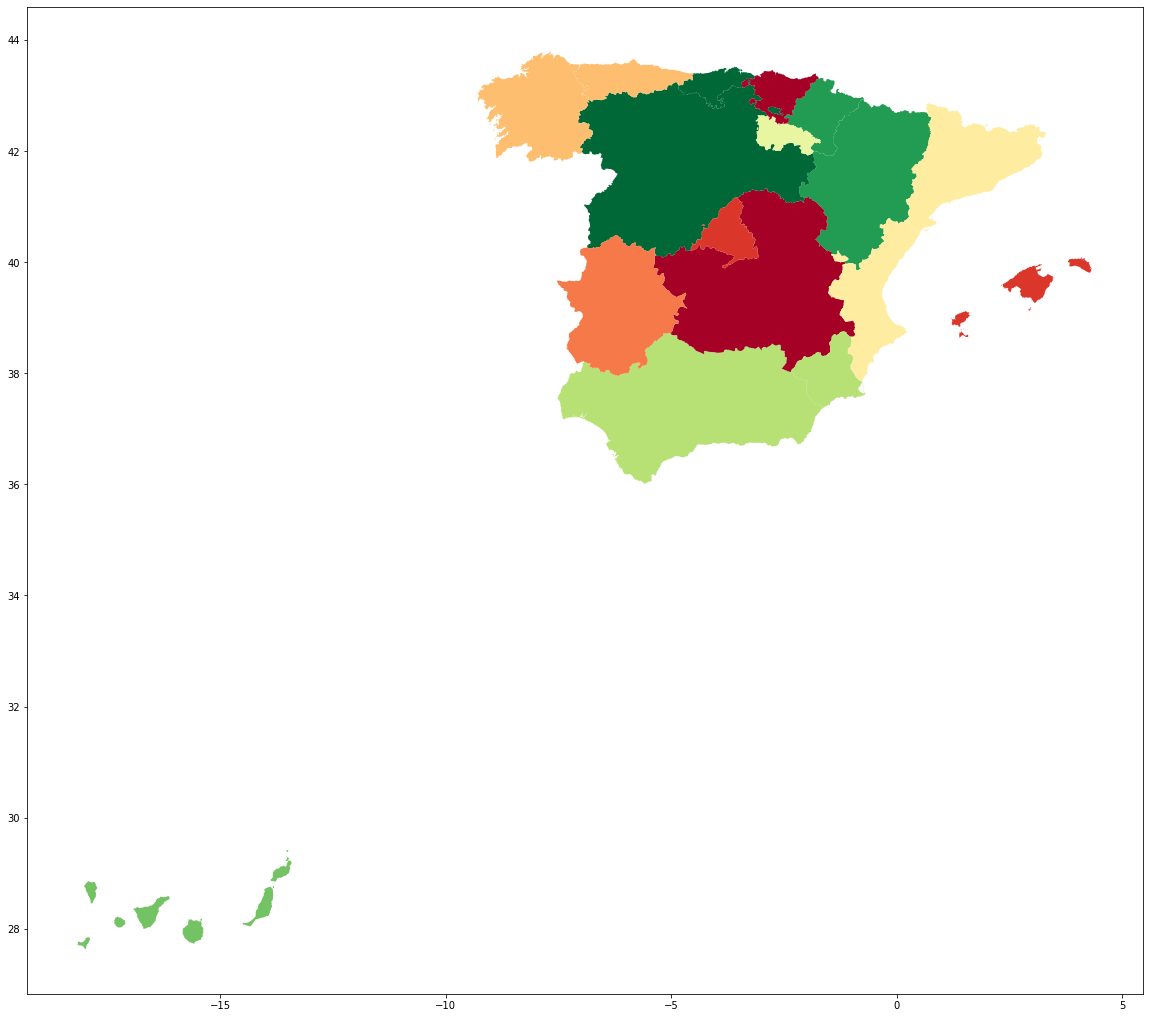

In [24]:
my_map = espania.plot(column="Sentiment", linewidth=0.3, cmap="RdYlGn", scheme="quantiles", k=10, alpha=1.0)